# Monte Carlo Methods


Se usan principalmente para:

- Integrales
- Distribuciones estadisticas
- Optimización

Son muy comunes en areás como:

- Astronomia
- Fisica Nuclear
- Quimica
- Biofisica
- Ingeniería Financiera: https://github.com/olafSmits/MonteCarloMethodsInFinance

## MCMC

Dentro de Monte Carlo, queremos darle relevancia al método de Cadenas de Markov :

https://github.com/dfm/MarkovPy


# ¿Por qué Monte Carlo?

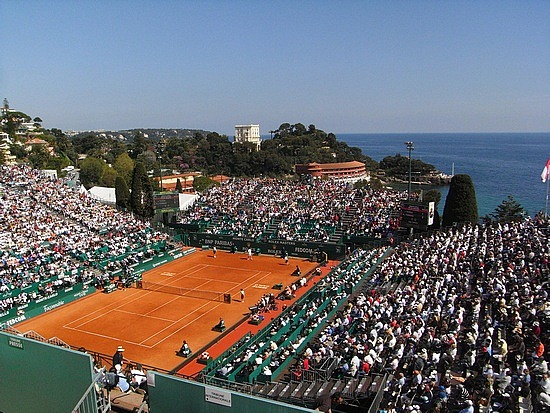

In [4]:
from IPython.display import Image
Image(filename='monte-carlo-tennis.jpg')

##Algo de Historia

- 1946, Primeros intentos de implementar el Metodo de Monte-Carlo, Ulam
- 1950, Se utilizan los metodos de Monte-Carlo en el proyecto Manhattan.

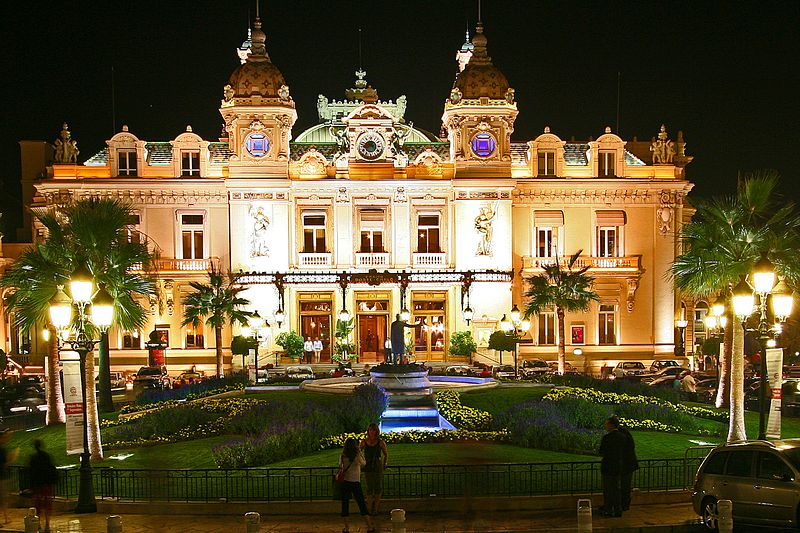

In [5]:
Image(filename='800px-Real_Monte_Carlo_Casino.jpg')

# Ejemplo: Calcular $\pi\ \ $ usando Monte-Carlo

## Podemos hacer el siguiente analisis:
    
Si tenemos un circulo de radio R = 1.0, dentro de un cuadrado de lado L = 2*R, la relacion entre las areás sera:
    
$\dfrac{Area Circulo}{Area Cuadrado} = \dfrac{\pi * r^2}{4*r^2} = \dfrac{\pi}{4} $

Por lo tanto:

$\pi = 4 * \dfrac{Area Circulo}{Area Cuadrado}$

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generemos numeros aleatorios en el intervalo x = [-1.0, 1.0], y = [-1.0, 1.0]

In [21]:
x = np.random.rand(10000)*2 - 1
y = np.random.rand(10000)*2 - 1

(-1, 1)

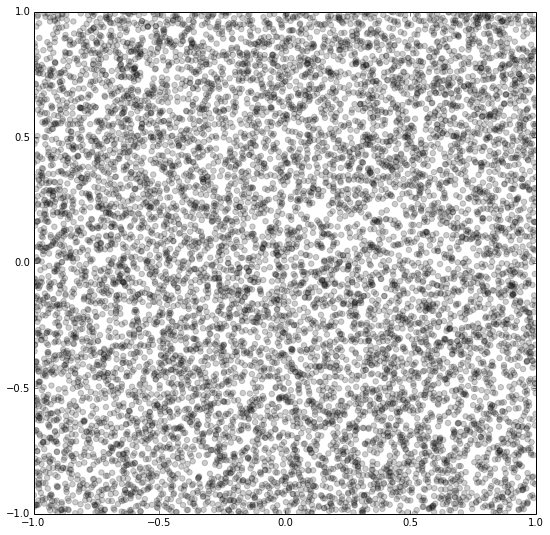

In [30]:
figure(figsize=(9, 9))
scatter(x, y, alpha=0.2, s=30, c='k')
xlim(-1, 1)
ylim(-1, 1)

## Seleccionemos los números que esten dentro de un circulo de radio R = 1

In [31]:
index = np.where(x**2+y**2<1)

In [32]:
xc = x[index]
yc = y[index]

(-1, 1)

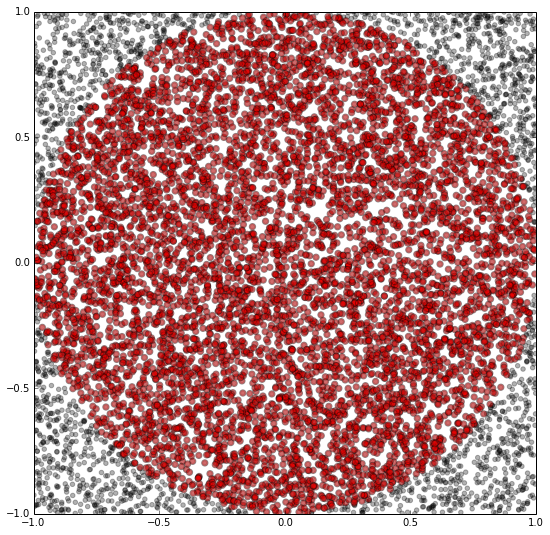

In [49]:
figure(figsize=(9,9))
scatter(x,y, c='k', alpha=0.3)
scatter(xc,yc, c='r', alpha=0.4, s=40)
xlim(-1, 1)
ylim(-1, 1)

In [12]:
#xc: Numero de puntos dentro del circulo
#xL Numero de puntos totales. 

In [23]:
pi = 4* float(len(xc))/float(len(x))
print ("pi = " '%.16f' % pi)

pi = 3.1459999999999999


# Ejercicio: 
##Calcular la integral:
$$
\int_{0}^{\infty} e^{-x^2} dx = \sqrt\pi
$$

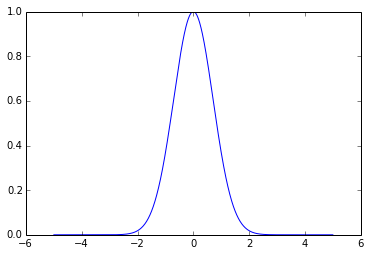

In [5]:
# tomado de http://nbviewer.ipython.org/github/forero/ComputationalMethods/blob/master/notes/integration.ipynb
def my_gauss(x):
    return exp(-(x**2))
min_x = -5.0
max_x = 5.0
x = linspace(min_x,max_x,1000)
gaussian = my_gauss(x)
plot(x,gaussian)


In [6]:
# esta funcion tiene los siguientes limites
min_y = 0.0
max_y = amax(gaussian)
print (min_y, max_y)

(0.0, 0.99997495023865035)


## Ahora generamos 1000 números aleatorios

In [8]:
n_random = 10000
random_x = random.rand(n_random) * (max_x - min_x) + min_x
random_y = random.rand(n_random) * (max_y - min_y) + min_y

(0, 1)

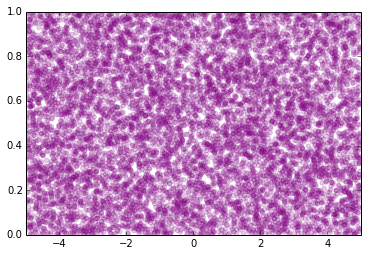

In [11]:
scatter(random_x, random_y, alpha=0.2, color = "purple")
xlim(-5, 5)
ylim(0, 1)

## Ahora seleccionamos todos los puntos que estan debajo de la gaussiana

(0, 1.1)

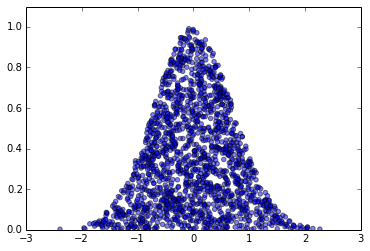

In [14]:
index = where(my_gauss(random_x) - random_y > 0.0)
scatter(random_x[index], random_y[index], alpha=0.5)
ylim(0, 1.1)

El valor de la integral es la fracción de puntos bajo la curva.

In [15]:
interval_integral = (max_y-min_y) * (max_x - min_x)
integral  = interval_integral * (size(index)/(1.0*size(random_y)))

#how many points are 'below'?
print ('dentro:', size(index), 'total:', size(random_y))
print('Valor de la integral:', integral)

('dentro:', 1696, 'total:', 10000)
('Valor de la integral:', 1.6959575156047511)


## ¿Que tan bueno es este resultado?
Para esto comparemos con el valor de la integral usando scipy

In [17]:
from scipy.integrate import quad
integral_scipy,err = quad(my_gauss, -5.0, 5.0)
print ("Integral con Monte-Carlo: ", integral)
print ("Integral con scipy: ", integral_scipy)
print ("Resultado Analitico ", sqrt(pi))

('Integral con Monte-Carlo: ', 1.6959575156047511)
('Integral con scipy: ', 1.7724538509027912)
('Resultado Analitico ', 1.7724538509055159)


# Integración usando scipy. 

In [39]:
quad?

Recibe como argunmento la funcion a integral, y los intervalor de integración. 
Documentacion http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.quad.html

In [40]:
def sin_function(x):
    return sin(x)**4

In [41]:
integral, error = quad(sin_function, 0, 2*pi)
integral

2.3561944902029874

# Ejercicio: 
## Calcular la integral de una Gaussiana en 6D

$$
\int_{0}^{\infty} e^{-r} dr = ...
$$

$$
r = x^2 + y^2 + z^2 + w^2 + k^2 + l^2
$$

Comparar con el valor teórico de esa integral

## Ayuda

### 2D integrals (usando Monte-Carlo)

We will follow the path of Monte-Carlo integration for highly dimensional integrals.

The principle is that to solve an integral in 2-D, we will generate a swarm of points in 3D within the intervals that we care: $x_{\rm min}, x_{\rm max}$, $y_{\rm min}$, $y_{\rm max}$, $f_{\rm min}(x,y)$ and $f_{\rm max}(x,y)$. 